# Cluster KMeans Model for Credit (US Survey Data 2019)

## Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Reading in Data to Pandas Dataframe

In [2]:
df_credit = pd.read_csv('C:/Users/Admin 21/Downloads/Customer Segmentation/Data/df_credit.csv').drop(columns="Unnamed: 0")
df_credit.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,2,21,3790.476607,male,50,45-54,8,high school diploma or GED,1,3,...,1,20-39.9,1,2,1,1,4,4,2,2
1,2,22,3798.868505,male,50,45-54,8,high school diploma or GED,1,3,...,1,20-39.9,1,2,1,1,4,3,2,2
2,2,23,3799.468393,male,50,45-54,8,high school diploma or GED,1,3,...,1,20-39.9,1,2,1,1,4,4,2,2
3,2,24,3788.076005,male,50,45-54,8,high school diploma or GED,1,3,...,1,20-39.9,1,2,1,1,4,4,2,2
4,2,25,3793.066589,male,50,45-54,8,high school diploma or GED,1,3,...,1,20-39.9,1,2,1,1,4,4,2,2


In [4]:
df_credit.shape

(4623, 351)

We have **```4623```** households in our data. These are households who have been turned debt or feared being turned down debt in the past five years.

## House Value vs Debt 



`HOUSES` - Total value of primary residence of household, 2019 dollars

`DEBT`- Total value of debt held by household, 2019 dollars

In [10]:
print(df_credit["HOUSES"].describe())
print(df_credit["DEBT"].describe())

count    4.623000e+03
mean     1.907981e+05
std      1.365502e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.250000e+05
max      3.709000e+07
Name: HOUSES, dtype: float64
count    4.623000e+03
mean     1.269438e+05
std      6.963218e+05
min      0.000000e+00
25%      1.000000e+03
50%      1.860000e+04
75%      9.920000e+04
max      1.903220e+07
Name: DEBT, dtype: float64


We can note the values involved are in scientific notation due to their large values. We will normalize the data in million USD for easy visualization.

Text(0.5, 1.0, 'Low Credit Score: Home Value against Household Debt')

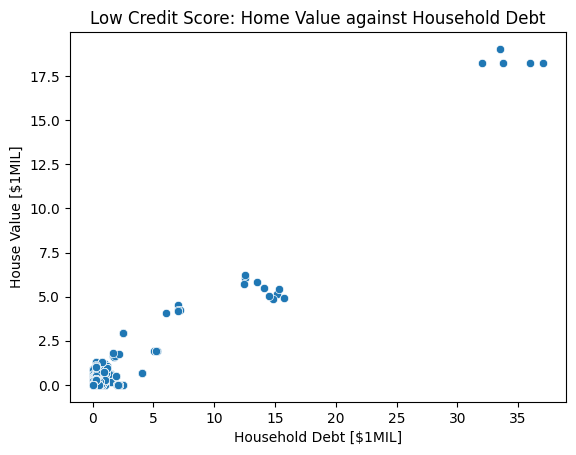

In [13]:
sns.scatterplot(x=df_credit["HOUSES"]/1e6, y=df_credit["DEBT"]/1e6)
plt.xlabel("Household Debt [$1MIL]")
plt.ylabel("House Value [$1MIL]")
plt.title("Low Credit Score: Home Value against Household Debt")

The graph tends to show a linear relationship between Household Debt and House Value. The higher the house value the greater the household debt. We can also see the dataset has cluster groups.

## UNSUPERVISED K-MEANS MODEL

### Splitting our Dataset

We will use vertical split to create our feature matrix. Our features include:

- `Home Value`
- `Household Debt`

The households are those that were turned down credit or fear being turned down credit past five months.

In [20]:
X=df_credit[["DEBT","HOUSES"]]
X.shape

(4623, 2)

Centroids

We can use the Cluster Widget to preview the best number of clusters

### Model Building

In [23]:
# we will use 3 clusters and random state of 42 for reproducibility
model= KMeans(n_clusters=3, random_state=42)

### Model Fitting

We fit our feature matrix to the model

In [24]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

### Extracting Cluster Label From k-means Model

In [29]:
labels=model.labels_
len(labels)

4623

We extract labels to divide the data points into three clusters.

In [41]:
labels[200:252]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### Plotting Clusters

Text(0.5, 1.0, 'Low Credit Score Households: Home Value against Household Debt')

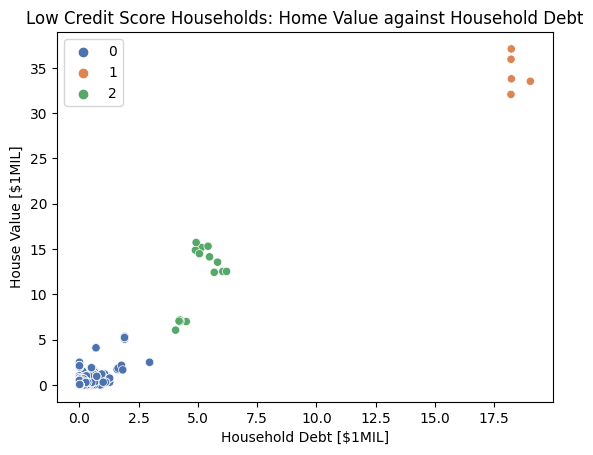

In [81]:
sns.scatterplot(x=df_credit["DEBT"]/1e6,
                y=df_credit["HOUSES"]/1e6,
                hue=labels,
                palette="deep"
)
plt.xlabel("Household Debt [$1MIL]")
plt.ylabel("House Value [$1MIL]")
plt.title("Low Credit Score Households: Home Value against Household Debt")

We can see the three clusters in our data clearly. We normalize our feature matrix to base 6 (`1e6`) for easy comprehension and uniformity in our xlim and ylim.

### Extracting Centroids of our Clusters

``Centroids`` - These are the centre of the cluster datasets. They represent the mean values.

In [46]:
centroids = model.cluster_centers_
centroids

array([[   91017.57766674,   116150.29328699],
       [18384100.        , 34484000.        ],
       [ 5065800.        , 11666666.66666667]])

This is are the coordinates for our centroids in the plot.

### Plotting Centroids

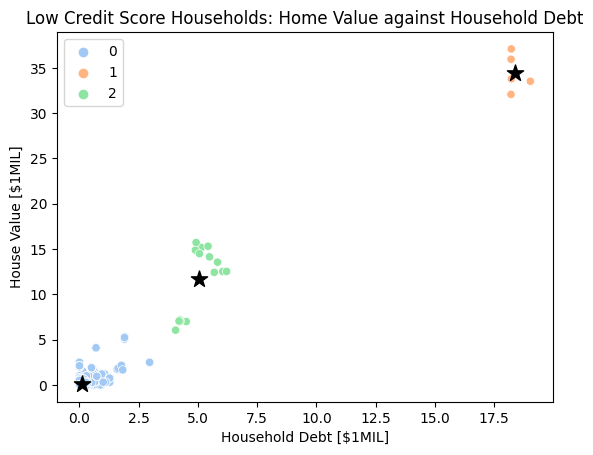

In [84]:
sns.scatterplot(x=df_credit["DEBT"]/1e6,
                y=df_credit["HOUSES"]/1e6,
                hue=labels,
                palette="pastel"
                )
plt.xlabel("Household Debt [$1MIL]")
plt.ylabel("House Value [$1MIL]")
plt.title("Low Credit Score Households: Home Value against Household Debt")

#plotting centroids

plt.scatter(x=centroids[:,0]/1e6,
            y=centroids[:,1]/1e6,
            color="black",
            marker="*",
            s=150)


Having plotted the centroids we can clearly see the centroid of our clusters.


## MODEL EVALUATION

### Evaluation Metrics

We will use inertia and silhouette score to evaluate our model performance.

#### INERTIA

In [88]:
inertia = model.inertia_
inertia

939554010797046.9

The model perfomed poorly with it being far away from `0`

#### SILHOUETTE SCORE

In [92]:
silh = silhouette_score(X, labels)
silh
# or alternatively silhouette_score(X, model.labels_)

0.9768842462944348

We can see our model `silhouette_score`  was good, with it nearer to one.

## Finding the Best Number of Clusters

### k Clusters

In [96]:
clusters = range(2,13,1)
inertias = []
silhouette_scores = []
# Loop to give the different inertia and silhouette scores as a list
for k in clusters:
    #instatiate our model
    
    model=KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    
    # model metrics
    inertias.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))

In [97]:
inertias

[3018038313336920.0,
 939554010797046.9,
 546098841715654.56,
 309310386410920.3,
 235243397481789.06,
 182225729179699.88,
 150670779013795.2,
 114321995931020.75,
 100340259483917.19,
 86229997033602.47,
 74757234072100.47]

In [98]:
silhouette_scores

[0.9855099957519555,
 0.9768842462944348,
 0.9490311483406091,
 0.839330043242819,
 0.7287406719898627,
 0.726989114305748,
 0.7263840026889208,
 0.7335125606476427,
 0.692157992955073,
 0.6949309528556856,
 0.6951831031001252]

### Inertia and Silhouette Score Elbow Plot

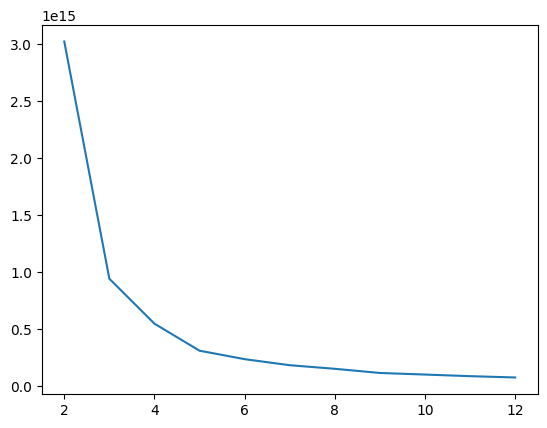

In [99]:
plt.plot(clusters, inertias)

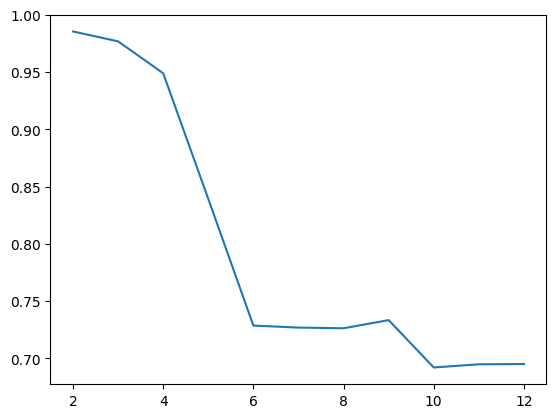

In [100]:
plt.plot(clusters, silhouette_scores)

From the plots we can pick `4` as the best number of clusters to use. The line starts to normalize near four in both plots.

## Best K-means Model

### Model Fitting

In [101]:
best_model = KMeans(n_clusters=4, random_state=42)
best_model.fit(X)   

KMeans(n_clusters=4, random_state=42)

### Plotting Cluster Points from Best Model

Text(0.5, 1.0, 'Low Credit Score Households: Home Value against Household Debt')

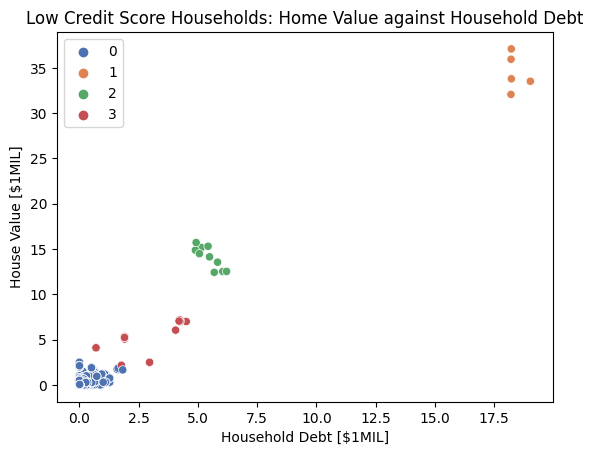

In [103]:
sns.scatterplot(x=df_credit["DEBT"]/1e6,
                y=df_credit["HOUSES"]/1e6,
                hue=best_model.labels_,
                palette="deep"
)
plt.xlabel("Household Debt [$1MIL]")
plt.ylabel("House Value [$1MIL]")
plt.title("Low Credit Score Households: Home Value against Household Debt")

### Best Model Centroids

In [109]:
centroids_best = best_model.cluster_centers_


### Plotting Centroids 

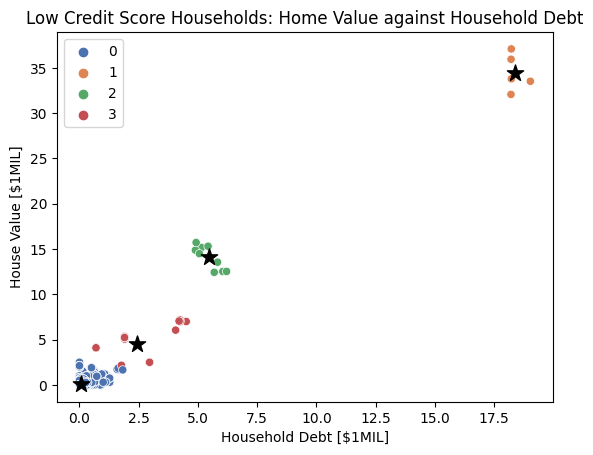

In [110]:
sns.scatterplot(x=df_credit["DEBT"]/1e6,
                y=df_credit["HOUSES"]/1e6,
                hue=best_model.labels_,
                palette="deep"
)
plt.xlabel("Household Debt [$1MIL]")
plt.ylabel("House Value [$1MIL]")
plt.title("Low Credit Score Households: Home Value against Household Debt")

plt.scatter(x=centroids_best[:,0]/1e6,
            y=centroids_best[:,1]/1e6,
            color="black",
            marker="*",
            s=150)


## Conclusions

### Centroids Data Frame

In [112]:
df_cent= X.groupby(best_model.labels_).mean()
df_cent

,DEBT,HOUSES
0,8.488629e+04,1.031872e+05
1,1.838410e+07,3.448400e+07
2,5.472800e+06,1.407400e+07
3,2.420929e+06,4.551429e+06


The values are similar to the centroids from the model.

### Mean Home Value against House Debt by Cluster

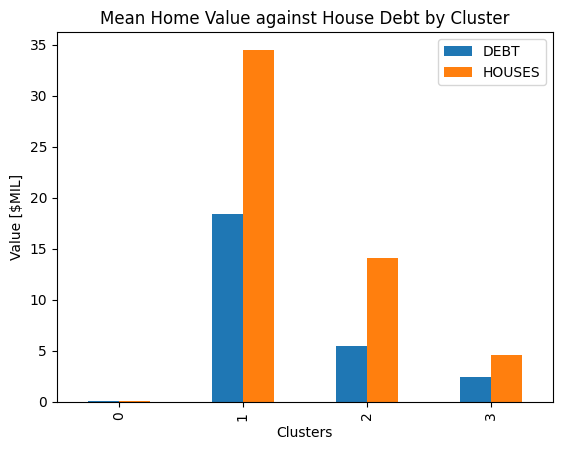

In [117]:
(df_cent/1e6).plot(kind="bar",
                xlabel="Clusters",
                ylabel="Value [$MIL]",
                )
plt.title("Mean Home Value against House Debt by Cluster")
plt.show()


We can note that the value of debt in all clusters is directly proportional with the mean value of houses. Cluster 1 has the largest mean value of homes and debt respectively.

### Proportion of Debt to Home Value

<AxesSubplot: title={'center': 'Proportion of Debt to Home Value'}, xlabel='Cluster', ylabel='Proportion Debt / Home'>

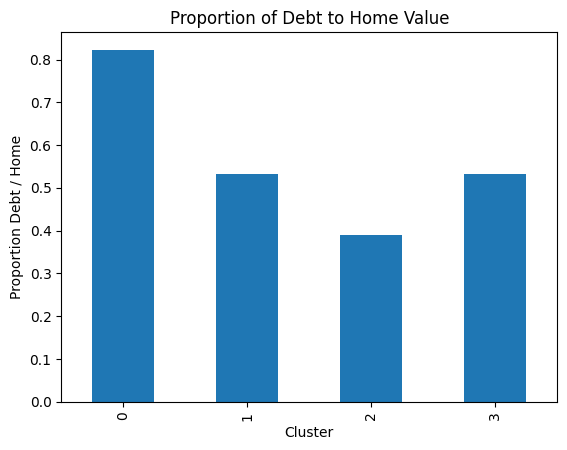

In [ ]:
(df_cent["DEBT"]/df_cent["HOUSES"]).plot(kind="bar",
                                    xlabel = "Cluster",
                                    ylabel = "Proportion Debt / Home",
                                    title = "Proportion of Debt to Home Value"
                                    )

We can note that in Clusters `0,1,3` the proportion of debt to the home value is above half and cluster two seems two would be good target for the bank credit.